# Introduzione alla computazione vettorizzata

## 1. Numpy ndarray

Creare un array e piuttosto semplice. Di per se possiamo immaginare gli ndarray di numpy come versioni potenziate dellle liste native di Python. 

In [1]:
import numpy as np 

data1 = [6, 7.5, 8, 9, 10]
arr1 = np.array(data1)

print(arr1)

[ 6.   7.5  8.   9.  10. ]


In [2]:
# specificare il tipo di dato 
arr2 = np.array(data1, dtype = np.int32)
print(arr2)

[ 6  7  8  9 10]


In [3]:
# creare degli array con inizialiazzazioni particolari
arr3 = np.ones(4)
print(arr3)

[1. 1. 1. 1.]


L'attributo fondamentale di un array numpy e la `shape`, ovvero la dimensione tensiorale dell'array. Questo concetto viene anche ripreso da librerie piu avanzate, come ad esempio PyTorch, Keras e Tensorflow. 

In [4]:
arr3.shape

(4,)

In [5]:
arr4 = np.ones((3,3,3))
print(arr4)

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


Le operazioni tra array possono essere di due tipi: 
1. elemento per elemento (sia operazioni algebriche che booleanemoltiplicazioni),
2. algebriche: moltiplicazioni fra matrici riga per colonna. 

In [6]:
arr5 = np.array([
    [1., 2., 3.],
    [4., 5., 6.]
])

# element-wise addition
arr6 = arr5 + 1
print(arr6)
print("\n")

# elementwise multiplication
arr7 = arr5 * 3
print(arr7)
print("\n")

# elemntwise exponentiation
arr8 = arr5**2
print(arr8)
print("\n")

# element-wise operation between arrays
arr9 = arr5 * arr5
print("\n")

# boolean operation
print(arr9 == arr8)
print("\n")
print(arr9 > arr6)
print("\n")

# matrix multiplication 
print(arr9@arr5.T)

[[2. 3. 4.]
 [5. 6. 7.]]


[[ 3.  6.  9.]
 [12. 15. 18.]]


[[ 1.  4.  9.]
 [16. 25. 36.]]




[[ True  True  True]
 [ True  True  True]]


[[False  True  True]
 [ True  True  True]]


[[ 36.  78.]
 [174. 405.]]


## 2. Slicing

Una delle operazioni piu importanti che possiamo effettuare su un array e lo *slicing*, ovvero selezionare un sottogruppo degli elementi presenti nell'array original. Quest'operazione avviene in maniera simile sugli array numpy rispetto a quanto avverrebbe per le liste di Python, ma con qualche differenza fondamentale. 

In [73]:
# slices of numpy arrays are interactive windows on the array 
arr = np.arange(10)

print(arr[5])
print(arr[5:8])

print(arr[5:8] == arr[4:7])

arr[5:8] = 12
print(arr)
print(arr[5:8] == arr[4:7])

# bare slice : takes all values in that dimension
print(arr[:])

# multidimensional arrays
mda = np.ones((2,2))
print(mda[:,:])

5
[5 6 7]
[False False False]
[ 0  1  2  3  4 12 12 12  8  9]
[False  True  True]
[ 0  1  2  3  4 12 12 12  8  9]
[[1. 1.]
 [1. 1.]]


In [75]:
# reordering 
arr.sort()
arr

array([ 0,  1,  2,  3,  4,  8,  9, 12, 12, 12])

In [76]:
# counting unique values 
np.unique(arr)

array([ 0,  1,  2,  3,  4,  8,  9, 12])

E importante sottolineare che ogni cambiamento effettuato sullo slice viene applicato all'array originale. Questo succede a meno che non si specifichi che lo slice che consideriamo non sia una copia completamente indipendente dall'array originale.

In [8]:
# creating a copy of a part of an ndarray. 
slice = arr[5:8].copy()
print(slice)

[12 12 12]


E anche possibile utilizzare condizioni booleane per creare lice dell'array. Questo permette di filtrare array molto grandi, individuando le righe che ci interessano da un dataset molto grande. Questo processo di filtraggio delle righe di un array e fondamentale per ogni applicazione di data analisi. 

In [9]:
# boolean indexing
example = np.arange(20)
filtered = example < 10
print(filtered)
print(example[filtered])

print(example[example<10])

# complex queries can be thought as multiple constraints 
mask = (example > 18) & (example < 10)
print(example[mask])

[ True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[]


Esiste anche un metodo che permette di estrarre un sottoinsieme dell'array in un ordine specifico. Questo metodo prende il nome di *fancy* indexing. A difference delle slice di prima, le *fancy* slice sono array indipendenti da quello originale. 

In [10]:
# fancy indexing: selecting a nuber of rows in a particular order 
arr = np.arange(32).reshape((8,4))
print(arr)
print('\n')
print(arr[[3,2,7,4]])
print('\n')
print(arr[[3,2,7,4], [0,3,2,1]])
print('\n')

# reordering the fancy slice is possible
print(arr[[1,5,7,2]][:,[0,3,2,1]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


[[12 13 14 15]
 [ 8  9 10 11]
 [28 29 30 31]
 [16 17 18 19]]


[12 11 30 17]


[[ 4  7  6  5]
 [20 23 22 21]
 [28 31 30 29]
 [ 8 11 10  9]]


## 3. Funzioni Universali

Le funzioni universali sono particolati funzioni che applicano operazioni elemento per elemento ad un array numpy. 
Si dividono in: 
1. operazioni **unarie**: prendono un input due array e ne ritornano uno come risultato,
2. operazioni **binarie**: prendono due input due array e ne ritornano uno come risultato, del quale ogni elemento corrisponde all risultato dell'operazione applicata agli elementi con lo stesso indice nei due array input. 

In [11]:
# unary functions 
arr = np.arange(10)
print(np.sqrt(arr))
print("\n")
print(np.exp(arr))
print("\n")

# binary functions 
np.random.seed(42)
x = np.random.standard_normal(8) # sampling from a standard normal distribution
y = np.random.standard_normal(8)

print(np.maximum(x,y))
print('\n')
print(np.minimum(x,y))
print('\n')
print(np.floor_divide(x,y)) # truncating the remainder

[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]


[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


[ 0.49671415  0.54256004  0.64768854  1.52302986  0.24196227 -0.23413696
  1.57921282  0.76743473]


[-0.46947439 -0.1382643  -0.46341769 -0.46572975 -0.23415337 -1.91328024
 -1.72491783 -0.56228753]


[-2. -1. -2. -4. -1.  0. -1. -2.]


Una lista completa di tutte le funzioni universali puo essere trovata nella [documentazione](https://numpy.org/devdocs/reference/ufuncs.html#available-ufuncs) di numpy

## 4. Programmazione orientata agli array

Programmare avendo gli array come mattoncini principali permette di ottenere molto vantaggi. Primo fra tutti, programmare in queso modo permette di ottenere un codice molto piu veloce di quello normale. Inoltre, di per se, qualsiasi libreria piu avanzata da per scontato questa tipologia di programmazione, che prende il nome di programmazione **vettorizzata**. 

In [13]:
points = np.arange(-5,5,0.01)
xs, ys = np.meshgrid(points,points)
print(xs, '\n \n', ys)

[[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]] 
 
 [[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_30501/1135028480.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Plot of $\sqrt{x^2 + y^2}$")


Text(0.5, 1.0, 'Plot of $\\sqrt{x^2 + y^2}$')

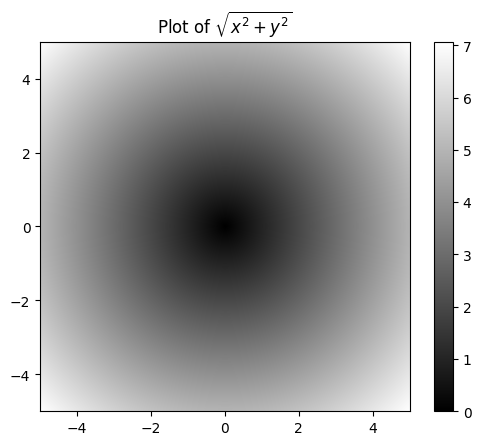

In [17]:
z = np.sqrt(xs**2 + ys**2)
import matplotlib.pyplot as plt 
plt.imshow(z, cmap = plt.cm.gray, extent = [-5,5,-5,5])
plt.colorbar()
plt.title("Plot of $\sqrt{x^2 + y^2}$")

**Broadcasting**
Il *broadcasting* governa il modo in cui le operazioni tra due array di dimensioni diverse avvengono. 

Normalmente le operazioni tra array con le stessi dimensioni avvengnono elemento per elemento. Nel caso in cui le dimensioni non coincidano *numpy* risolve in maniera automatica il problema *allungando* uno degli array in maniera tale da ottenerne due di dimensione uguale. 

**Broadcasting Rule**
NumPy confronta le "forme" (shapes) dei due array dimensione per dimensione, partendo dalla dimensione più a destra (trailing) e spostandosi verso sinistra.
Due array sono compatibili per il broadcasting se soddisfano queste due regole:

1. **Padding**: Se i due array hanno un numero diverso di dimensioni, la forma di quello con meno dimensioni viene "riempita" (padded) con degli 1 sul suo lato **sinistro**.

2. **Controlla la compatibilità delle dimensioni**. Confrontando le dimensioni da destra a sinistra, ogni dimensione deve essere compatibile. Una dimensione è compatibile se:
   - Sono uguali, oppure
   - Una di esse è 1.

Se queste regole sono soddisfatte, l'operazione è permessa. La forma dell'array risultante sarà il massimo, elemento per elemento, delle due forme originali. L'operazione di broadcasting avviene **sempre** lungo la dimensione unitaria. 

In [24]:
# utility function for demonstration purposes
def print_shape(array, name):
    print("shape di " + name + f' = {array.shape}') 

In [26]:
arr = np.arange(5)
print_shape(arr, "arr")

shape di arr = (5,)


In [ ]:
# first broadcasting example
arr*4

array([ 0,  4,  8, 12, 16])

In [27]:
print_shape(arr, "arr")
print_shape(np.array(4), "4")


shape di arr = (5,)
shape di 4 = ()


In [43]:
# second example
import numpy.random as rng 
rng.seed(42)

arr_n = rng.standard_normal((4,3))
mean_vec = arr_n.mean(0)

print_shape(arr_n, 'arr_n')
print_shape(mean_vec, 'mean_vec')

shape di arr_n = (4, 3)
shape di mean_vec = (3,)


In [45]:
arr_n

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439],
       [ 0.54256004, -0.46341769, -0.46572975]])

In [44]:
centered = arr_n - mean_vec
print_shape(centered, 'centered')

shape di centered = (4, 3)


In [46]:
centered

array([[-0.53866506, -0.12116414,  0.77810168],
       [ 0.48765064, -0.21705321, -0.10372382],
       [ 0.5438336 ,  0.78453489, -0.33906125],
       [-0.49281917, -0.44631753, -0.33531661]])

In [51]:
# third example 
zeros = np.zeros((4,3))
zeros[:] = 5
zeros

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

In [53]:
col = np.array([1,2,3,4])
print_shape(col, 'col')

shape di col = (4,)


In [56]:
zeros[:] = col[:, np.newaxis]
zeros

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.],
       [4., 4., 4.]])

In [57]:
print_shape(col[:, np.newaxis], 'col')

shape di col = (4, 1)


### **Esercizio 1** Scrivi una funzione che permetta di capire se due array sono compatibili o meno per il broadcasting. Utilizzare la funzione `zip_longest`dal pacchetto `iter_tools`. Carcare online la documentazione per la funzione. 

In [ ]:
# soluzione
from itertools import zip_longest

# la funzione accetta tuple e restituira (->) un valore booleano
def are_broadcastable_shapes(shape1: tuple, shape2: tuple) -> bool:
    """
    Verifica se due forme (shapes) di array sono compatibili
    per il broadcasting NumPy.

    Args:
        shape1: La forma (shape) del primo array (es. (3, 4)).
        shape2: La forma (shape) del secondo array (es. (1, 4)).

    Returns:
        True se le forme sono compatibili, False altrimenti.
    """
    
    # 1. Itera sulle dimensioni da destra a sinistra (usando reversed)
    # 2. Usa fillvalue=1 per "riempire" (paddare) la forma più corta
    #    con degli '1' a sinistra (Regola 1).
    for dim1, dim2 in zip_longest(reversed(shape1), reversed(shape2), fillvalue=1):
        
        # 3. Applica la Regola 2:
        #    Le dimensioni sono INCOMPATIBILI se sono diverse
        #    E NESSUNA delle due è 1.
        if dim1 != dim2 and dim1 != 1 and dim2 != 1:
            return False
            
    # Se il loop finisce senza conflitti, sono compatibili
    return True

In [38]:
print(are_broadcastable_shapes(arr.shape, np.array(4).shape))

True


In [47]:
print(are_broadcastable_shapes(arr_n.shape, mean_vec.shape))

True


In [48]:
print(are_broadcastable_shapes(arr_n.shape, np.array(4).shape))

True


In [50]:
error_broad = np.array([0,1])
print(are_broadcastable_shapes(arr_n.shape, error_broad.shape))

False


E anche possibile definire espressioni di logica condizionale su array. Questo permette operazioni di filtraggio molto ottimizzate. 

In [59]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [ ]:
# liist pipeline
result = [(x if c else y)
          for x,y,c in zip(xarr, yarr, cond)]
result

[np.float64(1.1),
 np.float64(2.2),
 np.float64(1.3),
 np.float64(1.4),
 np.float64(2.5)]

In [65]:
# array pipeline
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [ ]:
# capping 
result = np.where(result>2, 2, result)
result

array([1.1, 2. , 1.3, 1.4, 2. ])

## 5. Metodi per array booleani

In Python valori `True` e `False` sono trattati, rispettivamente, come i numerali 1 e 0

In [69]:
rng.seed(42)
arr = rng.standard_normal(100)
(arr>0).sum() # numero di elementi positivi

np.int64(46)

In [68]:
(arr<=0).sum() # numero di elementi nulli o negativi

np.int64(54)

In [71]:
# checking if at least one value is True in the array
bools = np.array([False, False, True, False])
bools.any()

np.True_

In [ ]:
# checking if all values in the array are True
bools.all()

np.False_

## Esericizio: Random Walk

Una "random walk" (o passeggiata aleatoria) è un percorso descritto da una successione di passi casuali. Si può immaginare un soggetto posizionato su una linea retta, partendo dal punto zero. Ad ogni istante, si lancia una moneta: se esce testa, si compie un passo avanti (+1); se esce croce, si compie un passo indietro (-1).

Il percorso che ne deriva, ovvero la posizione del soggetto dopo N lanci, è una "passeggiata aleatoria" in una dimensione.

Questo modello, pur basandosi su regole semplicissime, è incredibilmente potente per simulare fenomeni reali e apparentemente caotici: dal movimento di una molecola in un gas (moto Browniano) all'andamento dei prezzi in borsa, fino al percorso di un animale in cerca di cibo.

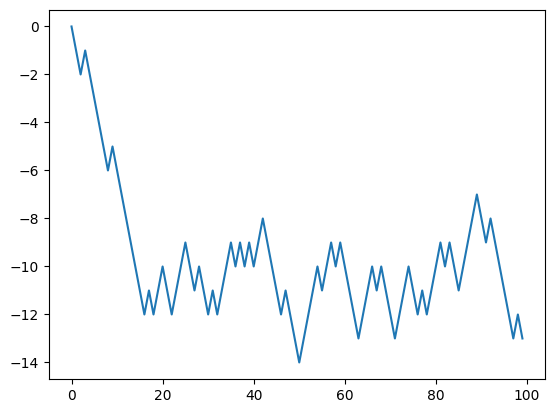

In [ ]:
# random implementation 
import random 
random.seed(42)
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

plt.plot(walk[:100])

### Parte 1
Si crei, attraverso il modulo `random` di numpy, la stessa random walk implementata sopra. Si ricavi anche il punto di massimo ed il punto di minimo. Si utilizzi il generatore di numeri casuali:
```python
rng = np.random.default_rng(seed = 42) # number generator
```

In [ ]:
nsteps = 1000
rng = np.random.default_rng(seed = 42) # number generator
draws = rng.integers(0,2, size = nsteps) # sampling from 0 to 2 (excluded) 
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

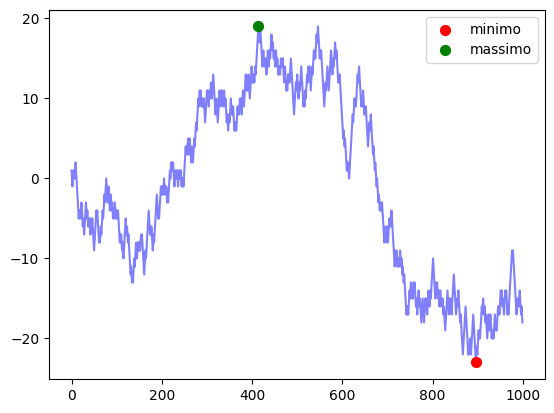

In [125]:
import matplotlib.pyplot as plt
plt.plot(walk, c = 'b', alpha = 0.5)
plt.scatter(walk.argmin(), walk.min(), color = 'red', marker = 'o', s = 50, label = 'minimo', zorder = 5)
plt.scatter(walk.argmax(), walk.max(), color = 'green', marker = 'o', s = 50, label = 'massimo', zorder = 5)
plt.legend()

Ulteriori informazioni riguardo la funzione `plot` della libreria *matplotlib* possono essere trovate nella relativa [documentazione](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). 

### Parte 2
Adesso si simulino in parallelo 5000 random walk diverse. Non si utilizzino cicli `for` nel codice.

**INDIZIO** Basta modificare il codice di prima. 

In [126]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0,2, size = (nwalks, nsteps)) # 0 or 1
steps = np.where(draws>0, 1, -1)
walks = steps.cumsum(axis = 1)

In [127]:
hits30 = (np.abs(walk) >=30).any(axis=1)
hits_30.sum()

AxisError: axis 1 is out of bounds for array of dimension 1

## Note

Si consiglia di dare un'occhiata alla documentazione ufficiale per: 
1. [Metodi Speciali](https://numpy.org/doc/2.1/reference/arrays.ndarray.html#special-methods)
2. [Operazioni Statistiche](https://numpy.org/doc/2.1/reference/arrays.ndarray.html#calculation)
3. [Manipolazione della Shape](https://numpy.org/doc/2.1/reference/arrays.ndarray.html#item-selection-and-manipulation)